### Exercise 2 - Wines

Import necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the two datasets needed for this analysis.

In [2]:
csv_df = pd.read_csv('winemag-data_first150k.csv')
json_df = pd.read_json('winemag-data-130k-v2.json')

Printing headers to make sure all the information is imported correctly.

In [3]:
csv_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
json_df.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


Getting a single dataframe that is the union of both files.

In [5]:
wines_df = pd.merge(left=csv_df,right=json_df,how='outer')
#Filtering the columns we are interested in
wines_df = wines_df[['country','designation','points','price','province','winery']]
wines_df

,country,designation,points,price,province,winery
0,US,Martha's Vineyard,96,235.0,California,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Macauley
3,US,Reserve,96,65.0,Oregon,Ponzi
4,France,La Brûlade,95,66.0,Provence,Domaine de la Bégude
...,...,...,...,...,...,...
234663,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef)
234664,US,None,90,75.0,Oregon,Citation
234665,France,Kritt,90,30.0,Alsace,Domaine Gresser
234666,France,None,90,32.0,Alsace,Domaine Marcel Deiss


Removing duplicates with drop_duplicates.

In [6]:
wines_df.drop_duplicates(inplace=True)
wines_df

,country,designation,points,price,province,winery
0,US,Martha's Vineyard,96,235.0,California,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Macauley
3,US,Reserve,96,65.0,Oregon,Ponzi
4,France,La Brûlade,95,66.0,Provence,Domaine de la Bégude
...,...,...,...,...,...,...
234662,France,Seppi Landmann Vallée Noble,90,28.0,Alsace,Domaine Rieflé-Landmann
234663,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef)
234664,US,None,90,75.0,Oregon,Citation
234666,France,None,90,32.0,Alsace,Domaine Marcel Deiss


Checking how many null values are in the dataframe.

In [7]:
wines_df.isna().sum()

country           58
designation    43546
points             0
price          11779
province          58
winery             0
dtype: int64

Changing null values in 'price' column with zeros.

In [8]:
wines_df['price'].fillna(0,inplace=True)

Checking again the null values in the dataframe.

In [9]:
wines_df.isna().sum()

country           58
designation    43546
points             0
price              0
province          58
winery             0
dtype: int64

Removing null values with dropna.

In [10]:
wines_df.dropna(inplace=True)

In [11]:
wines_df.isna().sum()

country        0
designation    0
points         0
price          0
province       0
winery         0
dtype: int64

As we can see, we only have 111838 rows left after dropping null values.

In [12]:
wines_df

,country,designation,points,price,province,winery
0,US,Martha's Vineyard,96,235.0,California,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Macauley
3,US,Reserve,96,65.0,Oregon,Ponzi
4,France,La Brûlade,95,66.0,Provence,Domaine de la Bégude
...,...,...,...,...,...,...
234660,Israel,Oak Aged,90,20.0,Galilee,Dalton
234661,France,Domaine Saint-Rémy Herrenweg,90,0.0,Alsace,Domaine Ehrhart
234662,France,Seppi Landmann Vallée Noble,90,28.0,Alsace,Domaine Rieflé-Landmann
234663,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef)


Extracting a subset of wines from Spain with 'reserva' in their designation.
- Filtering by country name with wines_df['country'] == 'Spain'
- Filtering by 'reserva' with method str.contains('reserva',case=False)

In [13]:
spanish_wines_df = wines_df[(wines_df['country'] == 'Spain') & (wines_df['designation'].str.contains('reserva',case=False))]
spanish_wines_df

,country,designation,points,price,province,winery
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Bodega Carmen Rodríguez
17,Spain,6 Años Reserva Premium,95,80.0,Northern Spain,Valduero
21,Spain,Prado Enea Gran Reserva,95,79.0,Northern Spain,Muga
161,Spain,Arnegui Reserva,90,22.0,Northern Spain,Pagos del Rey
191,Spain,Brut Reserva,89,17.0,Catalonia,Bohigas
...,...,...,...,...,...,...
234138,Spain,Santa Rosa Reserva,93,50.0,Levante,Enrique Mendoza
234427,Spain,Reserva,88,40.0,Northern Spain,Finca Albret
234523,Spain,Reserva,90,18.0,Northern Spain,Taron
234533,Spain,Viña Olagosa Gran Reserva,90,21.0,Northern Spain,Bodegas Perica


Checking the mean points value for spanish reserva wines and all wines.

In [14]:
spanish_wines_df["points"].mean().round(2)


88.25

In [15]:
wines_df["points"].mean().round(2)

88.57

The spanish reserva wines have a slightly less puntuation than the global mean.

Re-examinating the subset of Spanish 'reserva' wines, looking if Spain's Rioja wines (North Spain in the dataset), are the ones which predominates in the subset and displaying it in a bar graphic.

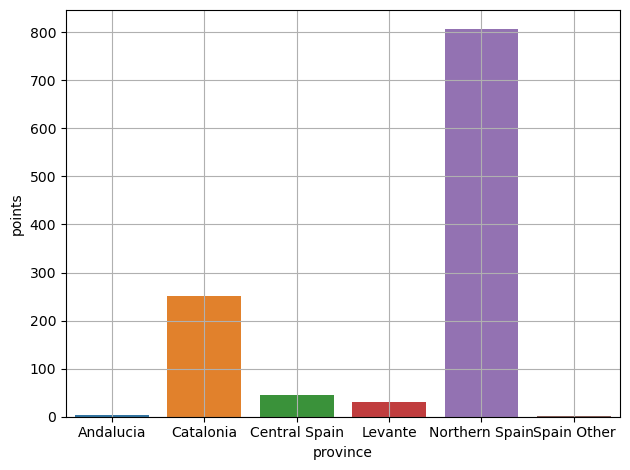

In [16]:
sns.barplot(data=spanish_wines_df.groupby(["province"]).count().reset_index(), x = "province", y = "points")
plt.grid(True)
plt.tight_layout()
plt.show()


Displaying the top 10 highest-rated wines.

In [17]:
wines_df.sort_values(by="points", ascending=False).head(10)

,country,designation,points,price,province,winery
226866,Portugal,Nacional Vintage,100,650.0,Port,Quinta do Noval
30142,US,En Chamberlin Vineyard,100,65.0,Oregon,Cayuse
45822,Italy,Guado de' Gemoli,100,195.0,Tuscany,Giovanni Chiappini
37131,Italy,Masseto,100,460.0,Tuscany,Tenuta dell'Ornellaia
139083,Italy,Occhio di Pernice,100,210.0,Tuscany,Avignonesi
212820,France,Cristal Vintage Brut,100,250.0,Champagne,Louis Roederer
212821,France,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Salon
180585,France,Brut,100,259.0,Champagne,Krug
225162,Italy,Cerretalto,100,270.0,Tuscany,Casanova di Neri
226282,US,Royal City,100,80.0,Washington,Charles Smith


- Calculating the average wine price per country.
- Identifying the country with the highest average price.

In [18]:
#Grouping wines by country nad calculating the mean price
price_mean = wines_df.groupby("country")["price"].mean().round(2)
price_max = price_mean.max()
price_max_country = price_mean.idxmax()

print(f"The country with the highest price is: {price_max_country} and its average price is: {price_max}")

The country with the highest price is: England and its average price is: 49.43


Graphically representing the price versus score for the Spanish 'reserva' wines by province.

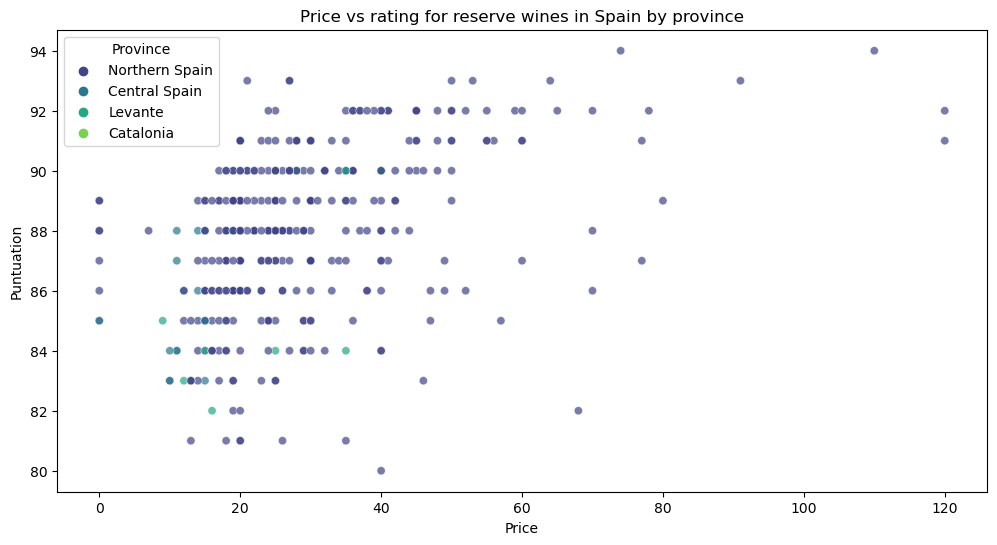

In [19]:
reserva_spain = wines_df[(wines_df['country'] == 'Spain') & (wines_df['designation'] == 'Reserva')]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='points', hue='province', data=reserva_spain, palette='viridis', alpha=0.7)
plt.title('Price vs rating for reserve wines in Spain by province')
plt.xlabel('Price')
plt.ylabel('Puntuation')
plt.legend(title='Province')
plt.show()

Checking for the province with the most expensive wine.

In [20]:
most_expensive_province = reserva_spain.groupby('province')['price'].mean().idxmax()
print(f"The province with the expensive wine is: {most_expensive_province}")

The province with the expensive wine is: Northern Spain


Checking for the province with the highest-rated 'reserva' wine.

In [21]:
most_rated_province = reserva_spain.groupby('province')['points'].mean().idxmax()
print(f"The province with the highest rated wine is: {most_rated_province}")

The province with the highest rated wine is: Catalonia


Opcion 2

Now we made a comparative analisize beetween the price and puntuation with other values

In [22]:
wines_df = pd.merge(left=csv_df,right=json_df,how='outer')
#Filtering the columns we are interested in
wines_df = wines_df.drop(['Unnamed: 0','description','title','taster_twitter_handle'], axis=1)
wines_df


,country,designation,points,price,province,region_1,region_2,variety,winery,taster_name
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN
...,...,...,...,...,...,...,...,...,...,...
234663,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,None,None,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima
234664,US,None,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt
234665,France,Kritt,90,30.0,Alsace,Alsace,None,Gewürztraminer,Domaine Gresser,Roger Voss
234666,France,None,90,32.0,Alsace,Alsace,None,Pinot Gris,Domaine Marcel Deiss,Roger Voss


In [23]:
wines_df.drop_duplicates(inplace=True)
wines_df


,country,designation,points,price,province,region_1,region_2,variety,winery,taster_name
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN
...,...,...,...,...,...,...,...,...,...,...
234662,France,Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,None,Pinot Gris,Domaine Rieflé-Landmann,Roger Voss
234663,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,None,None,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima
234664,US,None,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt
234666,France,None,90,32.0,Alsace,Alsace,None,Pinot Gris,Domaine Marcel Deiss,Roger Voss


In [24]:
wines_df['price'].fillna(wines_df["price"].mean(), inplace=True)
wines_df


,country,designation,points,price,province,region_1,region_2,variety,winery,taster_name
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN
...,...,...,...,...,...,...,...,...,...,...
234662,France,Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,None,Pinot Gris,Domaine Rieflé-Landmann,Roger Voss
234663,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,None,None,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima
234664,US,None,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt
234666,France,None,90,32.0,Alsace,Alsace,None,Pinot Gris,Domaine Marcel Deiss,Roger Voss


In [25]:
wines_df.isna().sum()


country            59
designation     48552
points              0
price               0
province           59
region_1        27210
region_2       100013
variety             1
winery              0
taster_name     73205
dtype: int64

In [26]:
wines_df.fillna("Unknown", inplace=True)
wines_df


,country,designation,points,price,province,region_1,region_2,variety,winery,taster_name
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,Unknown
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Unknown,Tinta de Toro,Bodega Carmen Rodríguez,Unknown
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,Unknown
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,Unknown
4,France,La Brûlade,95,66.0,Provence,Bandol,Unknown,Provence red blend,Domaine de la Bégude,Unknown
...,...,...,...,...,...,...,...,...,...,...
234662,France,Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Unknown,Pinot Gris,Domaine Rieflé-Landmann,Roger Voss
234663,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Unknown,Unknown,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima
234664,US,Unknown,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt
234666,France,Unknown,90,32.0,Alsace,Alsace,Unknown,Pinot Gris,Domaine Marcel Deiss,Roger Voss


c:\Users\Guim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


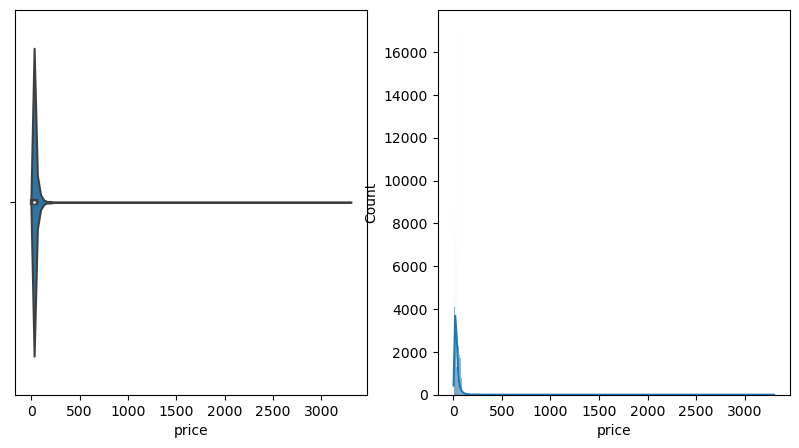

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.violinplot(x=wines_df['price'],ax=axes[0])
sns.histplot(wines_df, x="price", kde=True, ax=axes[1])
plt.show()

c:\Users\Guim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


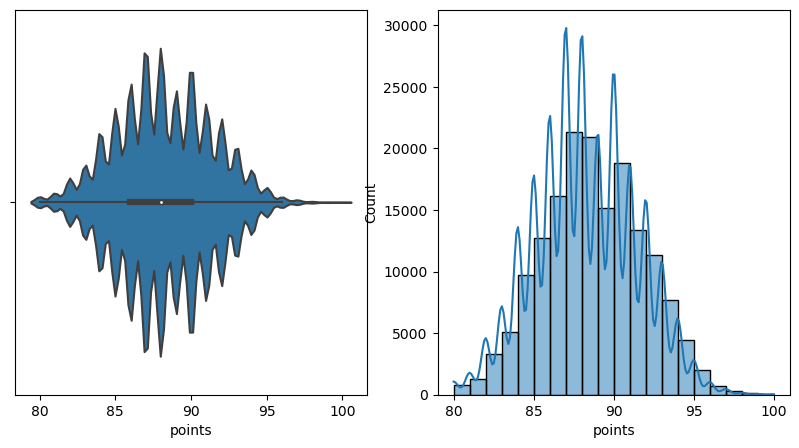

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.violinplot(x=wines_df['points'],ax=axes[0])
sns.histplot(wines_df, x="points", kde=True, ax=axes[1],bins=20)
plt.show()

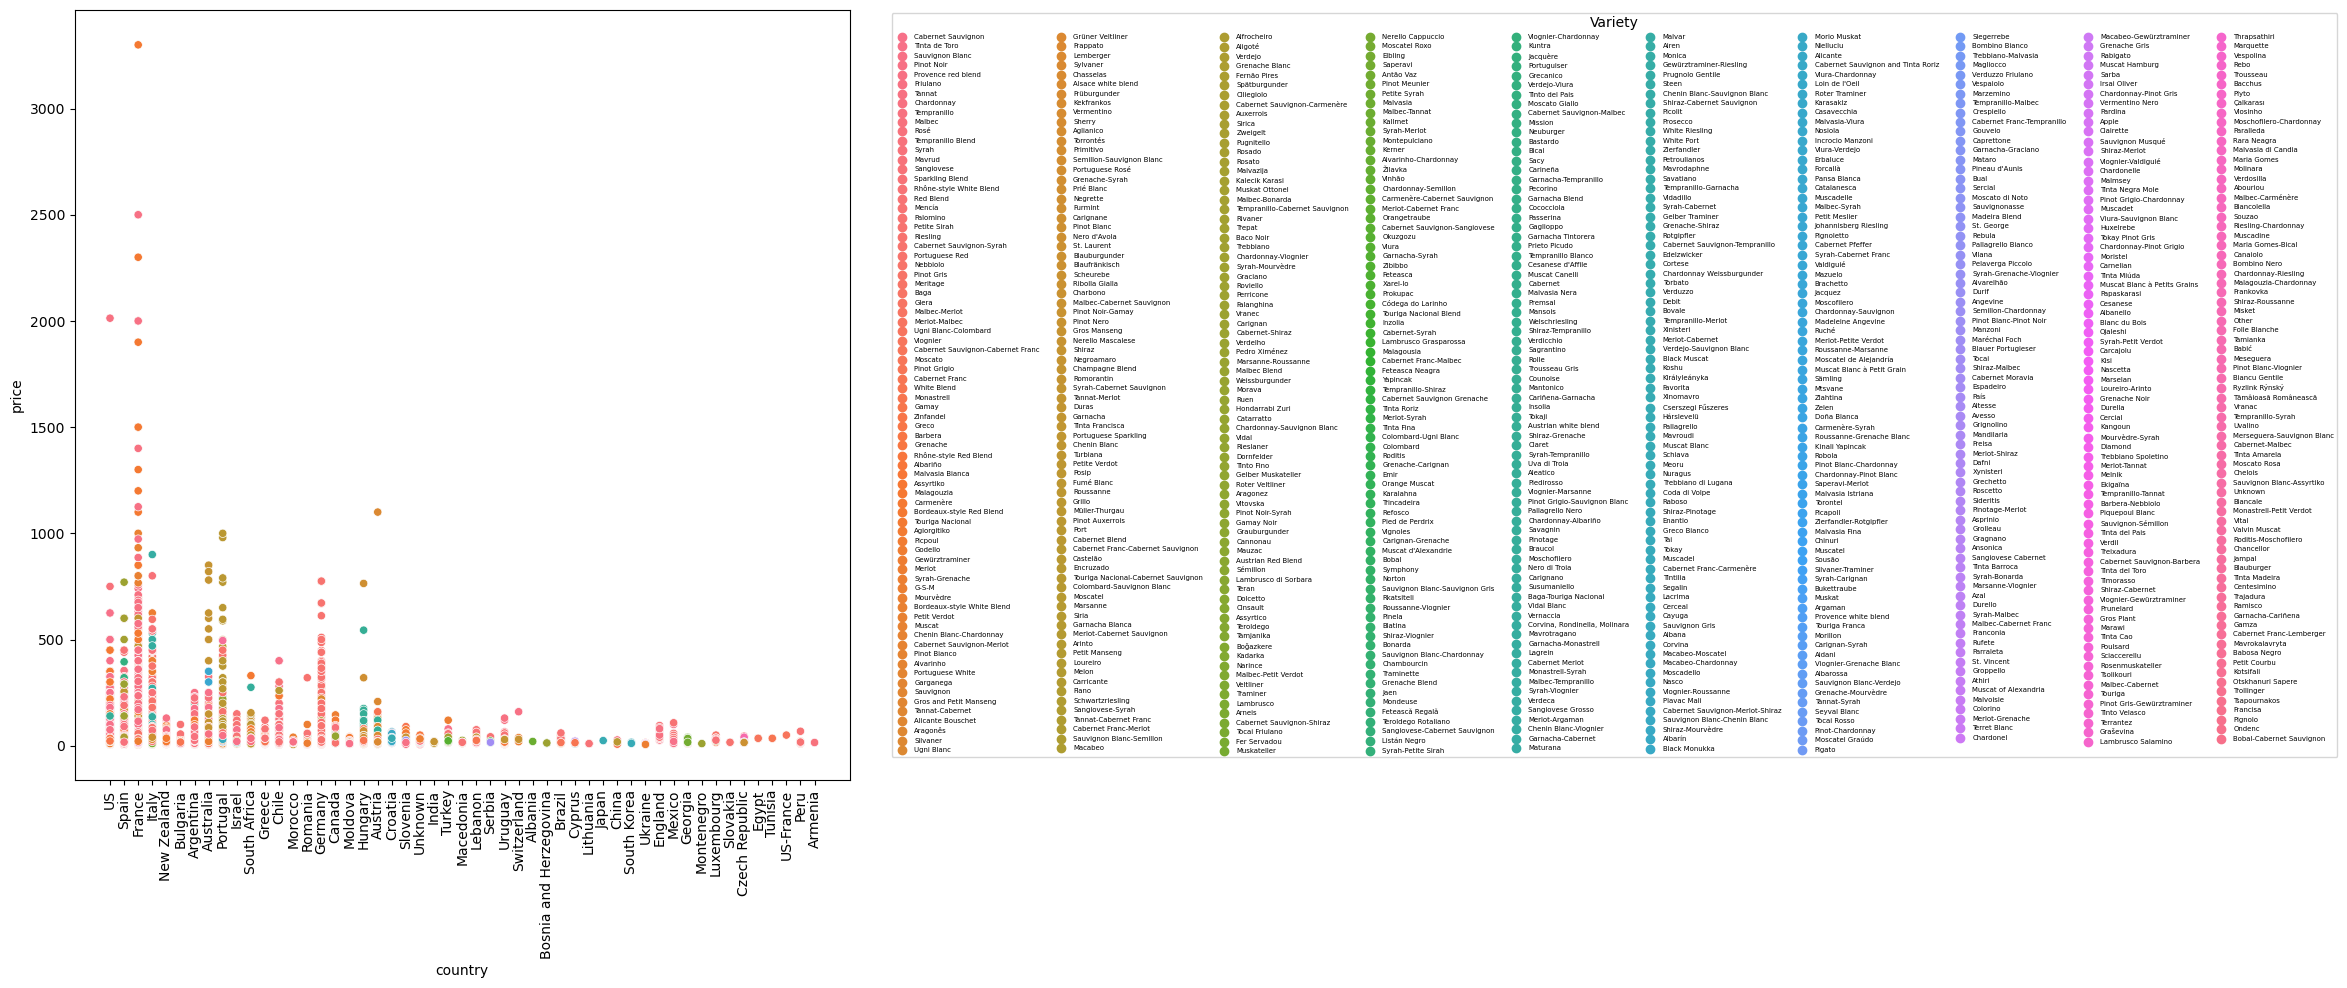

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(wines_df,x='country',y='price',hue='variety')
plt.xticks(rotation=90)
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left',ncol=10,fontsize=5)
plt.show()

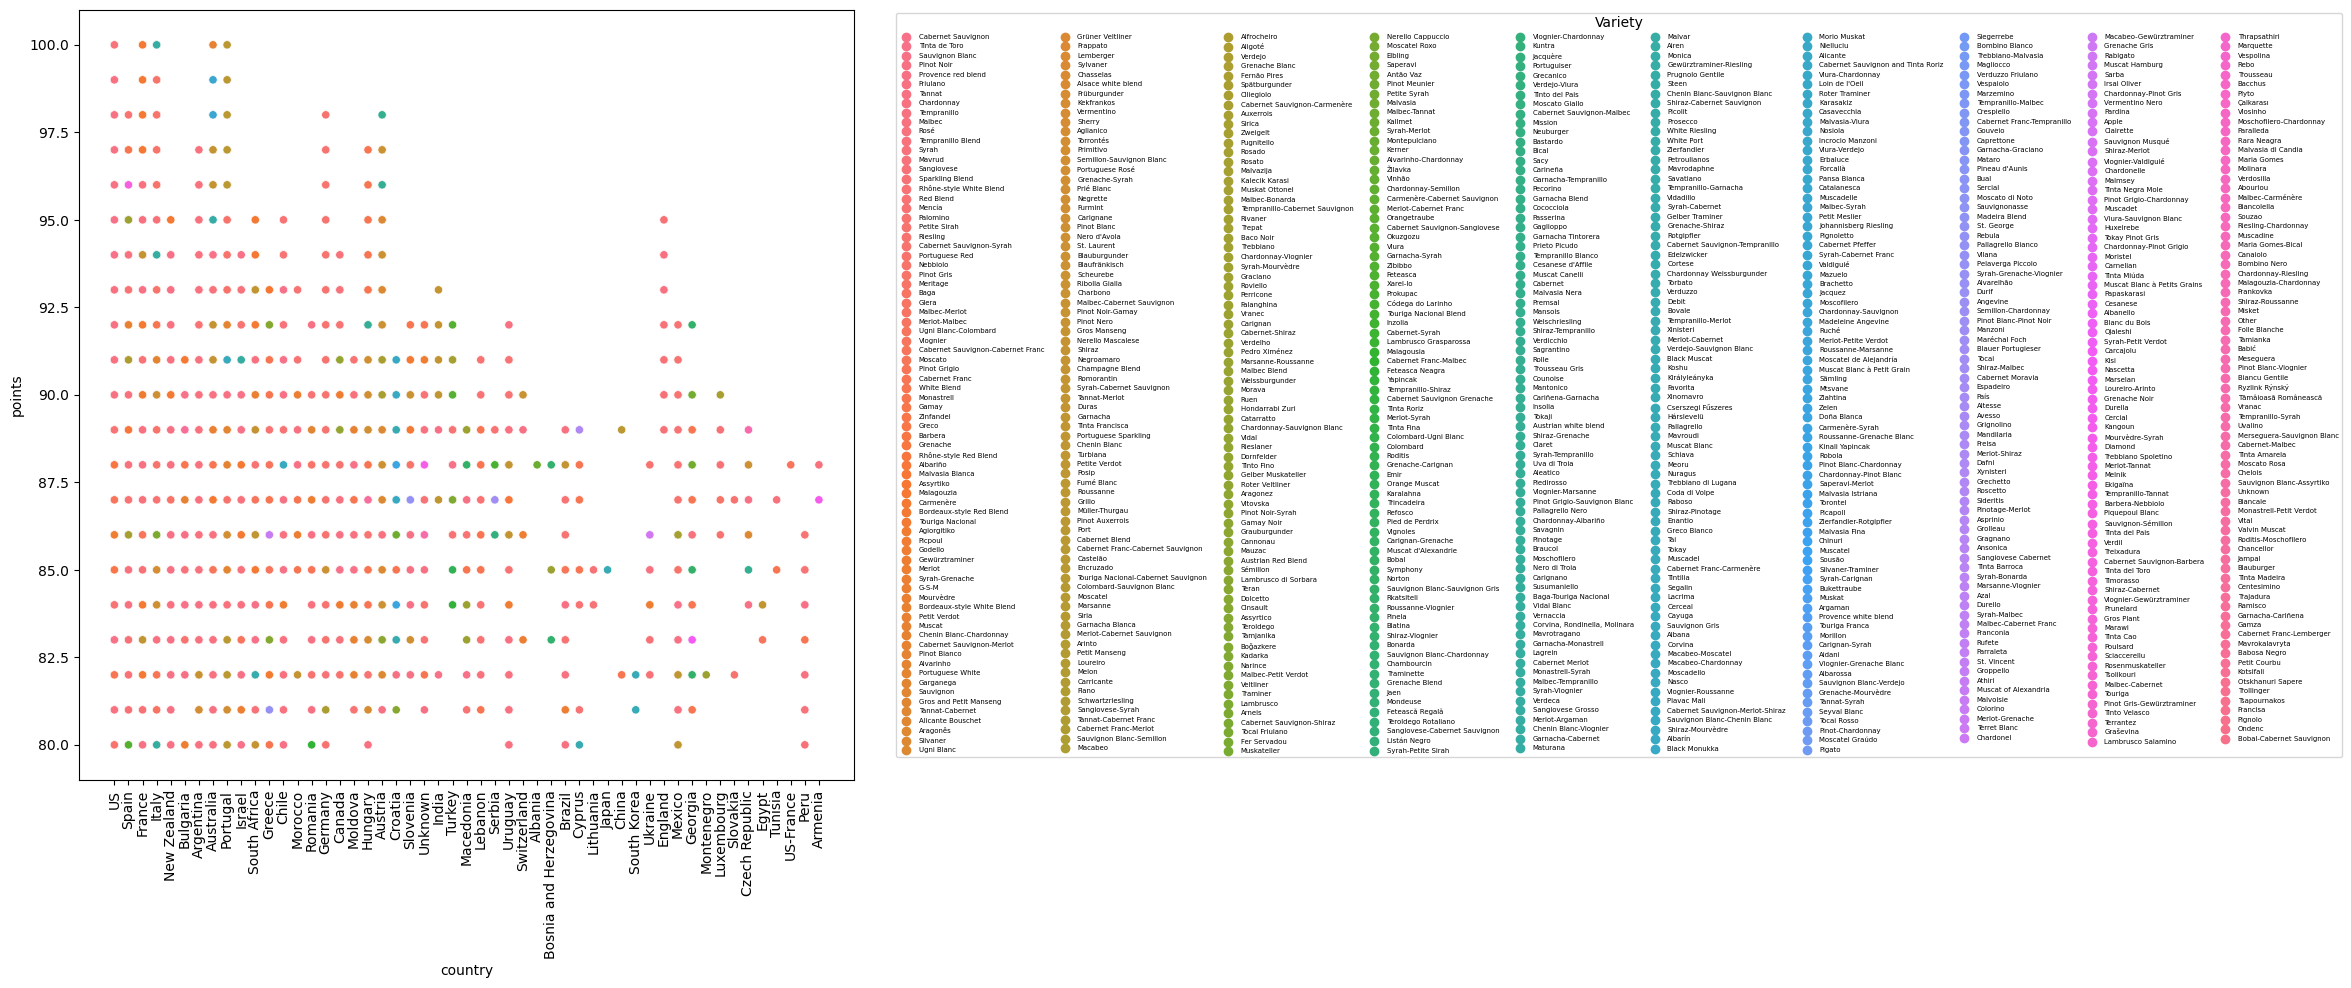

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(wines_df,x='country',y='points',hue='variety')
plt.xticks(rotation=90)
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left',ncol=10,fontsize=5)
plt.show()

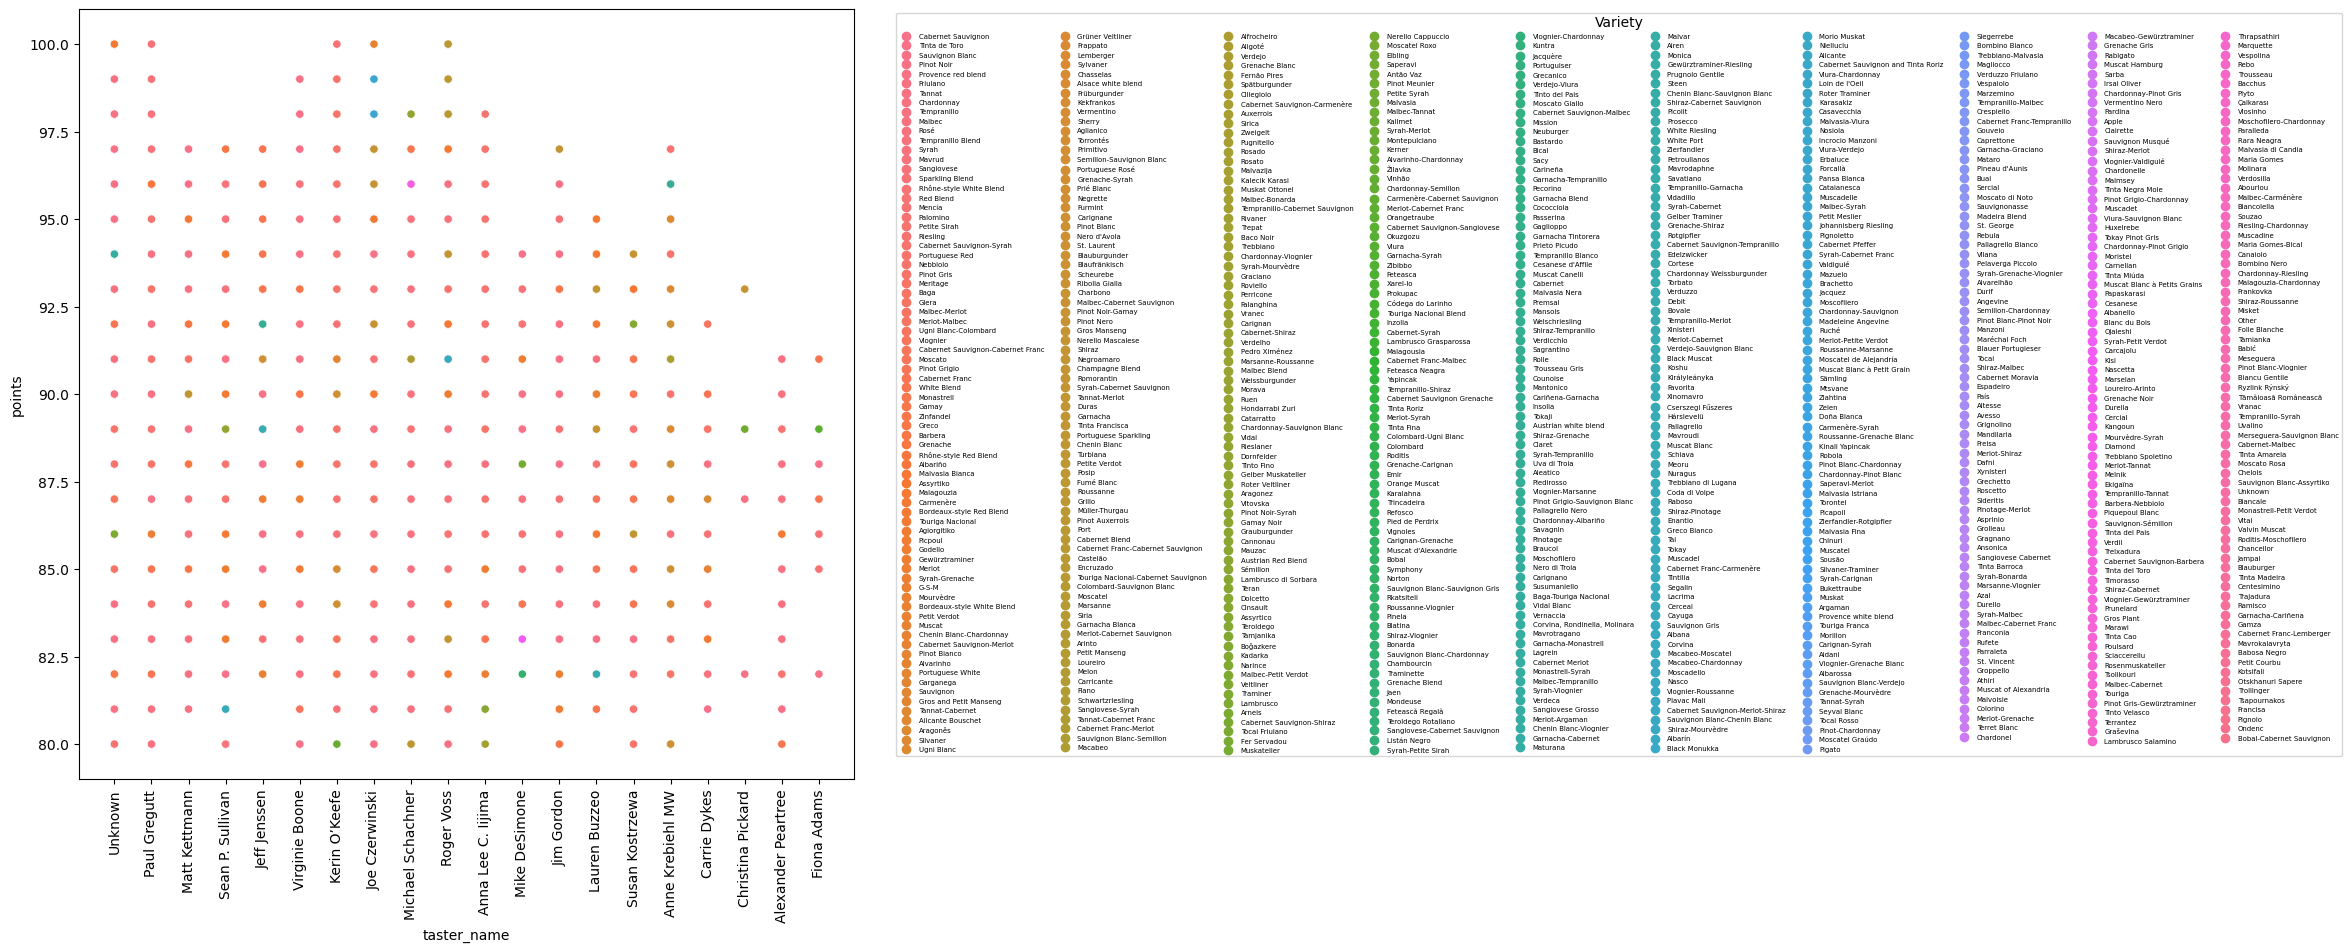

In [65]:
plt.figure(figsize=(10,10))
sns.scatterplot(wines_df,x='taster_name',y='points',hue='variety')
plt.xticks(rotation=90)
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left',ncol=10,fontsize=5)
plt.show()